In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import scipy.integrate as integrate

import lop

In [10]:
#x = np.arange(0.0001, 0.9999, 0.001)
x = np.arange(0.1, 0.9, 0.001)

v = 100.0

mu = x

aa = v*mu
bb = v*(1-mu)


N = 500

bets = np.random.beta(aa, bb, (N,x.shape[0]))




In [11]:
counts = 0
tots = 0
for i in range(x.shape[0]):
    for j in range(i+1, x.shape[0]):
        #print('i: ' + str(i) + ' j: ' + str(j))
        #print(bets[:,j])
        #print(bets[:,i])
        #print(bets[:,j] >= bets[:,i])
        counts += np.sum(bets[:,j] >= bets[:,i])
        tots += bets.shape[0]
        
print(counts)
p_samp = counts / tots
print('p_samp = ' + str(p_samp))

150317358
p_samp = 0.9406593116395494


In [75]:
v = 60.0
abs_sigma = 1.0
pair_sigma = 1.0
l = 1.0

F = np.array([0, 0.4])
x = np.array([0, l])

f_base = 0.0



abs_probit = lop.AbsBoundProbit(sigma=abs_sigma, v=v)
ml = abs_probit.mean_link(F)
aa, bb = abs_probit.get_alpha_beta(F)

p_abs = beta.pdf(ml, aa, bb)
print(p_abs)

pref_probit = lop.PreferenceProbit(sigma=pair_sigma)

p_pair = lop.std_norm_cdf((1 / pair_sigma**2)*(F[1]-F[0]))
print(p_pair)

rbf = lop.RBF_kern(1.0, l)
cov = rbf.cov(x, x)
print(cov)

log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
prior = np.exp(log_prior)
print(prior)

post_pair = prior * p_pair
post_abs = prior * p_abs[0] * p_abs[1]

print('post pairwise = ' + str(post_pair))
print('post abs = ' + str(post_abs))

[6.15469038 6.31140872]
0.6554217416103242
[[1.01       0.60653066]
 [0.60653066 1.01      ]]
1.1421200712696815
post pairwise = 0.7485703262396822
post abs = 44.365387525901035


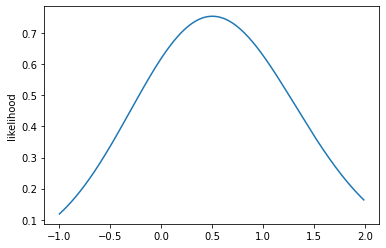

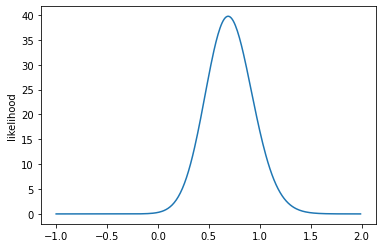

In [150]:
v = 60.0
abs_sigma = 1.0
pair_sigma = 1.0
l = 1.0




abs_probit = lop.AbsBoundProbit(sigma=abs_sigma, v=v)
rbf = lop.RBF_kern(1.0, l)


x_base = 0.0
f_base = 0.0

def abs_like(f, x_c):
    F = np.array([f_base, f_base+f])
    x = np.array([x_base, x_base+x_c])
    
    ml = abs_probit.mean_link(F)
    aa, bb = abs_probit.get_alpha_beta(F)

    p_abs = beta.pdf(np.array([0.5, 0.7]), aa, bb)
    
    cov = rbf.cov(x, x)
    log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
    prior = np.exp(log_prior)
    
    return p_abs[0] * p_abs[1] * prior

def pair_like(f, x_c):
    F = np.array([f_base, f_base+f])
    x = np.array([x_base, x_base+x_c])
    
    cov = rbf.cov(x, x)
    log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
    prior = np.exp(log_prior)
    
    p_pair = lop.std_norm_cdf((1 / pair_sigma**2)*(F[1]-F[0]))
    
    return p_pair * prior

abs_ls = []
pair_ls = []
fs = np.arange(-1.0, 2.0, 0.01)
for f in fs:
    abs_ls.append(abs_like(f,l))
    pair_ls.append(pair_like(f,l))
    
plt.plot(fs, pair_ls)
plt.ylabel('likelihood')
plt.figure()
plt.ylabel('likelihood')
plt.plot(fs, abs_ls)

plt.show()

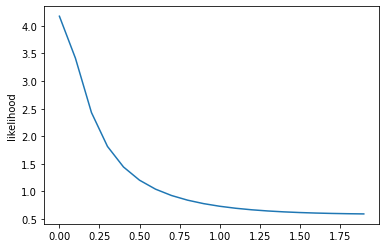

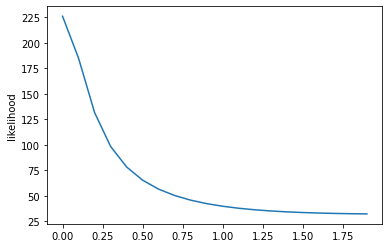

In [151]:
abs_ls = []
pair_ls = []
xs = np.arange(0, 2.0, 0.1)
f=0.7
for x in xs:
    abs_ls.append(abs_like(f, l*x))
    pair_ls.append(pair_like(f,l*x))
    
plt.plot(xs, pair_ls)
plt.ylabel('likelihood')
plt.figure()
plt.ylabel('likelihood')
plt.plot(xs, abs_ls)

plt.show()

In [157]:
f = 0.5

def abs_like_q(q, f, x_c):
    F = np.array([f_base, f_base+f])
    x = np.array([x_base, x_base+x_c])
    
    ml = abs_probit.mean_link(F)
    aa, bb = abs_probit.get_alpha_beta(F)

    p_abs = beta.pdf(np.array([0.5, q]), aa, bb)
    
    cov = rbf.cov(x, x)
    log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
    prior = np.exp(log_prior)
    
    return p_abs[1] * prior

def p_larger(f, x_c):
    res = integrate.quad(abs_like_q, 0.5, 1.0, args=(f,x_c))
    return res[0]

res = p_larger(f, l)
print(res)

0.7194853829711497


f_pair: 0.49999999999999983
f_abs: 0.49999999999999983


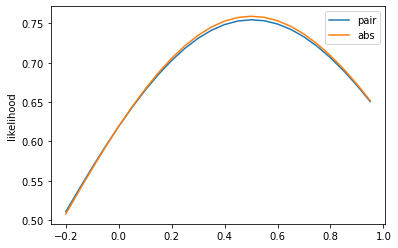

In [164]:
v = 1.0
abs_sigma = 0.8
pair_sigma = 1.0
l = 1.0


abs_probit = lop.AbsBoundProbit(sigma=abs_sigma, v=v)
rbf = lop.RBF_kern(1.0, l)

def abs_like_q(q, f, x_c):
    F = np.array([f_base, f_base+f])
    x = np.array([x_base, x_base+x_c])
    
    ml = abs_probit.mean_link(F)
    aa, bb = abs_probit.get_alpha_beta(F)

    p_abs = beta.pdf(np.array([0.5, q]), aa, bb)
    
    cov = rbf.cov(x, x)
    log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
    prior = np.exp(log_prior)
    
    return p_abs[1] * prior

def p_larger(f, x_c):
    res = integrate.quad(abs_like_q, 0.5, 1.0, args=(f,x_c))
    return res[0]


def pair_like(f, x_c):
    F = np.array([f_base, f_base+f])
    x = np.array([x_base, x_base+x_c])
    
    cov = rbf.cov(x, x)
    log_prior = -0.5 * np.transpose(F) @ cov @ F - 0.5*np.log(np.linalg.det(cov))
    prior = np.exp(log_prior)
    
    p_pair = lop.std_norm_cdf((1 / pair_sigma**2)*(F[1]-F[0]))
    
    return p_pair * prior



abs_ls = []
pair_ls = []
fs = np.arange(-0.2, 1.0, 0.05)
for f in fs:
    abs_ls.append(p_larger(f,l))
    pair_ls.append(pair_like(f,l))
    
f_pair = fs[np.argmax(pair_ls)]
f_abs = fs[np.argmax(abs_ls)]

print('f_pair: ' + str(f_pair))
print('f_abs: ' + str(f_abs))

plt.plot(fs, pair_ls)
plt.ylabel('likelihood')
plt.plot(fs, abs_ls)
plt.legend(['pair', 'abs'])

plt.show()